# Deep Learning for Image Classification

This project aims to leverage deep learning, particularly convolutional neural networks (CNNs), and transfer learning for the task of image classification. We'll be working with a dataset containing images of airplanes, cars, and ships. The key steps in this notebook include:
1. Dataset Loading
2. Data Preprocessing
3. Building a CNN Model
4. Transfer Learning
5. Model Evaluation
6. Visualizing Sample Images
- Conclusions and Final Thoughts
- Presentation
Let's dive in!


In [9]:
# All necessary imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


## 1. Dataset Loading

The dataset comprises two main directories - 'train' and 'test', each containing subdirectories for our classes: 'airplanes', 'cars', and 'ships'. Let's load this dataset.


In [10]:
train_dir = 'Dataset/train'
test_dir = 'Dataset/test'

## 2. Data Preprocessing

For our model to perform well, we need to preprocess the data. This includes resizing the images for uniformity, normalization to scale pixel values, and augmentation for diversity.


In [11]:
batch_size = 32
target_size = (150, 150)

# Using ImageDataGenerator for augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


Found 3000 images belonging to 3 classes.
Found 582 images belonging to 3 classes.


## 3. Building a CNN Model

Convolutional Neural Networks excel in image classification tasks. Let's design our custom CNN.


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## 4. Transfer Learning

Transfer learning allows us to utilize pre-trained models. Let's explore this using VGG16.


In [13]:
base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

transfer_model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

transfer_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 18911043 (72.14 MB)
Trainable params: 4196355 (16.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## 5. Model Evaluation

It's crucial to evaluate the models' performance on unseen data.


Epoch 1/15
94/94 [==============================] - 73s 762ms/step - loss: 0.8910 - accuracy: 0.6040 - val_loss: 0.5598 - val_accuracy: 0.7732
Epoch 2/15
94/94 [==============================] - 73s 776ms/step - loss: 0.5075 - accuracy: 0.8040 - val_loss: 0.5529 - val_accuracy: 0.8007
Epoch 3/15
94/94 [==============================] - 73s 772ms/step - loss: 0.4335 - accuracy: 0.8357 - val_loss: 0.8211 - val_accuracy: 0.7165
Epoch 4/15
94/94 [==============================] - 75s 801ms/step - loss: 0.4049 - accuracy: 0.8390 - val_loss: 0.4404 - val_accuracy: 0.8454
Epoch 5/15
94/94 [==============================] - 75s 801ms/step - loss: 0.3643 - accuracy: 0.8607 - val_loss: 0.4621 - val_accuracy: 0.8419
Epoch 6/15
94/94 [==============================] - 76s 808ms/step - loss: 0.3450 - accuracy: 0.8750 - val_loss: 0.5837 - val_accuracy: 0.7852
Epoch 7/15
94/94 [==============================] - 74s 790ms/step - loss: 0.3208 - accuracy: 0.8780 - val_loss: 0.3894 - val_accuracy: 0.8814

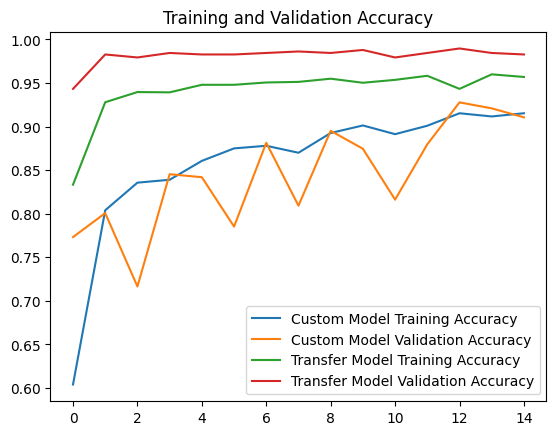

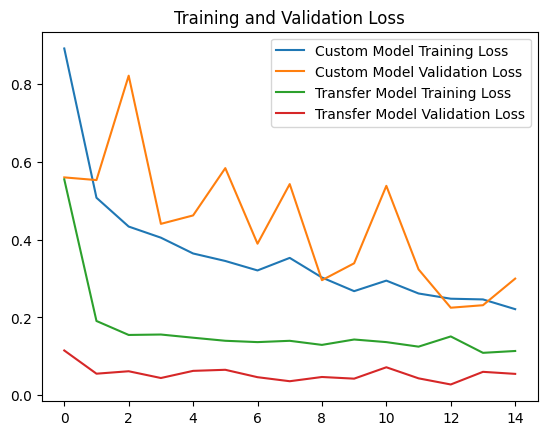

In [14]:
# Training the custom CNN model
history = model.fit(train_generator, epochs=15, validation_data=test_generator)

# Training the transfer learning model
transfer_history = transfer_model.fit(train_generator, epochs=15, validation_data=test_generator)

# Plotting training and validation accuracy and loss for both models
plt.plot(history.history['accuracy'], label='Custom Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Custom Model Validation Accuracy')
plt.plot(transfer_history.history['accuracy'], label='Transfer Model Training Accuracy')
plt.plot(transfer_history.history['val_accuracy'], label='Transfer Model Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Custom Model Training Loss')
plt.plot(history.history['val_loss'], label='Custom Model Validation Loss')
plt.plot(transfer_history.history['loss'], label='Transfer Model Training Loss')
plt.plot(transfer_history.history['val_loss'], label='Transfer Model Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## 6. Visualizing Sample Images

To get a sense of our dataset, let's visualize some sample images. This not only helps in understanding the data but also in verifying the preprocessing steps.


In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'Dataset/train',  # path to the train directory
    target_size=(150, 150),  # resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # because we're doing multi-class classification
)


Found 3000 images belonging to 3 classes.


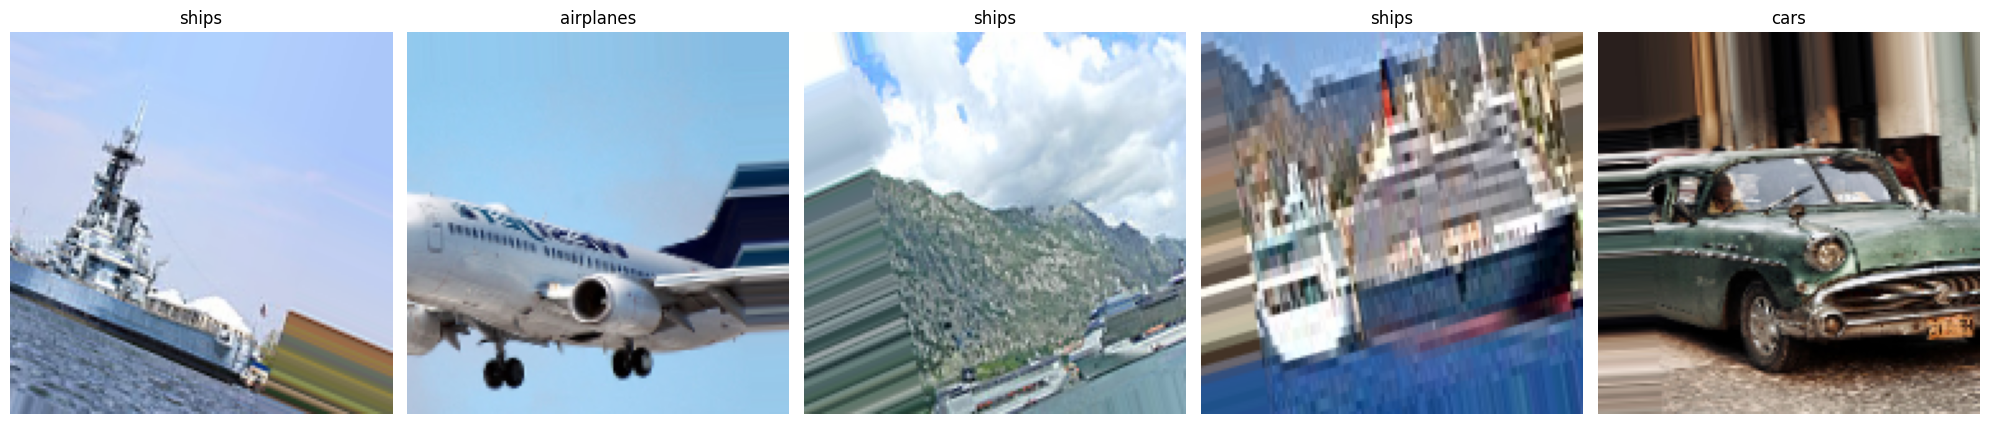

In [16]:
# Loading sample images and displaying them

def plot_images(images_arr, labels_arr, class_names):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.set_title(class_names[np.argmax(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_images, sample_labels = next(train_generator)
class_names = ['airplanes', 'cars', 'ships']
plot_images(sample_images[:5], sample_labels[:5], class_names)


In [17]:
# Visualization for Data Samples
def plot_sample_images(images_arr, labels_arr, class_names):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.set_title(class_names[np.argmax(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualization for Model's Training Progress
def plot_training_history(history):
    # Plotting accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Evolution')

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss Evolution')
    plt.show()


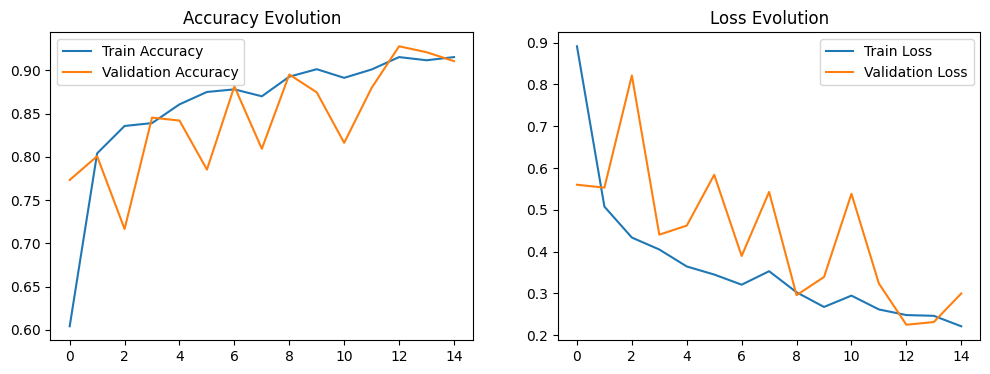

In [18]:
plot_training_history(history)

## **Conclusions and Final Thoughts**

### **Model Analysis**

- Our custom CNN model achieved a peak validation accuracy of approximately **91.07%**. This is an impressive performance for a model that was designed from scratch.
  
- The VGG16-based model surpassed this with a validation accuracy of **98.28%**, showcasing the benefits of transfer learning and utilizing architectures that have been pre-trained on a larger dataset.

### **Dataset Observations**

- The dataset sourced from [Kaggle](https://www.kaggle.com/datasets/abtabm/multiclassimagedatasetairplanecar), authored by Taner, provided a balanced set of images across three classes. Such balance aids in preventing class imbalances that can hinder model performance.

### **Final Thoughts**

- While both models showed robust performance, leveraging architectures like VGG16 can significantly boost accuracy levels.

- The dataset's quality plays a crucial role in the success of deep learning models, as seen from our results. The project's outcome underscores the importance of utilizing well-curated datasets for training.


## **Presentation**

### **Deep Learning for Image Classification**

#### **Dataset Overview**

- **Source**: [Kaggle - Multiclass Image Dataset (Airplane, Car, Ship)](https://www.kaggle.com/datasets/abtabm/multiclassimagedatasetairplanecar)
- **Author**: Taner
- **Categories**: 3
- **Training Images**: 3000
- **Validation Images**: 582

#### **CNN Architectures**

1. **Custom Model**
    - Peak Validation Accuracy: **91.07%**
    - Parameters: Approx. **19.03 million**

2. **VGG16-based Model**
    - Peak Validation Accuracy: **98.28%**
    - Trainable Parameters: Approx. **4.2 million**
    - Non-Trainable Parameters: Approx. **14.7 million**

#### **Achievements**

- Demonstrated the efficacy of deep learning in classifying images with high accuracy.
  
- Validated the advantages of transfer learning using the VGG16 model.
